In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.statespace.sarimax.SARIMAXResults import summary
register_matplotlib_converters()
from time import time
from dateutil.parser import parse
import testing_2 as tst
import calplot

# Importo datos de anio incompleto

In [2]:
path_archivo='../01_data/'#camino para llegar a archivo a importar
nombre_archivo='Temixco_2018_incompleto.csv'# archivo a importar
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,parse_dates=True)
tmx_inc

,time,Ib,Ig,To,RH,WS,WD,P,Eg
0,2018-01-01 00:00:00,0.000,0.0,18.70,36.34,1.422,316.0,87864.11,0.0
1,2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37,0.0
2,2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64,0.0
3,2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21,0.0
4,2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91,0.0
...,...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32,0.0
52556,2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70,0.0
52557,2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03,0.0
52558,2018-12-31 23:40:00,0.170,0.0,17.99,47.85,1.528,358.8,87470.02,0.0


In [4]:
nantmx=tmx_inc[tmx_inc.Ig.isnull()]
ind=list(nantmx.index)
isteps=[]
datavoid=1
datavoids=[]
idates=[]
print(nantmx.time[ind[0]])
print('at index',nantmx.time[ind[0]])
isteps.append(ind[0])
idates.append(nantmx.time[ind[0]])
for x in range(0,len(ind)-1,1):
    if ind[x+1]-ind[x]>1:
        print('datavoid lenght:',datavoid)
        datavoids.append(datavoid)
        datavoid=1
        print('new_void_at:',nantmx.time[ind[x+1]])
        isteps.append(ind[x+1])
        idates.append(nantmx.time[ind[x+1]])
        print('at index',ind[x+1])
    else:
        datavoid+=1 #aqu'i se determina la longitud del datavoid
datavoids.append(datavoid)

2018-01-30 00:00:00
at index 2018-01-30 00:00:00
datavoid lenght: 144
new_void_at: 2018-03-29 00:00:00
at index 12528
datavoid lenght: 144
new_void_at: 2018-06-15 00:00:00
at index 23760
datavoid lenght: 144
new_void_at: 2018-06-27 00:00:00
at index 25488
datavoid lenght: 144
new_void_at: 2018-07-28 00:00:00
at index 29952
datavoid lenght: 144
new_void_at: 2018-08-12 00:00:00
at index 32112
datavoid lenght: 144
new_void_at: 2018-10-05 00:00:00
at index 39888
datavoid lenght: 144
new_void_at: 2018-11-14 00:00:00
at index 45648


In [5]:
isteps

[4176, 12528, 23760, 25488, 29952, 32112, 39888, 45648]

In [6]:
idates

['2018-01-30 00:00:00',
 '2018-03-29 00:00:00',
 '2018-06-15 00:00:00',
 '2018-06-27 00:00:00',
 '2018-07-28 00:00:00',
 '2018-08-12 00:00:00',
 '2018-10-05 00:00:00',
 '2018-11-14 00:00:00']

In [7]:
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,index_col=0,parse_dates=True)
tmx_inc

,Ib,Ig,To,RH,WS,WD,P,Eg
time,,,,,,,,
2018-01-01 00:00:00,0.000,0.0,18.70,36.34,1.422,316.0,87864.11,0.0
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37,0.0
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64,0.0
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21,0.0
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91,0.0
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32,0.0
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70,0.0
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03,0.0


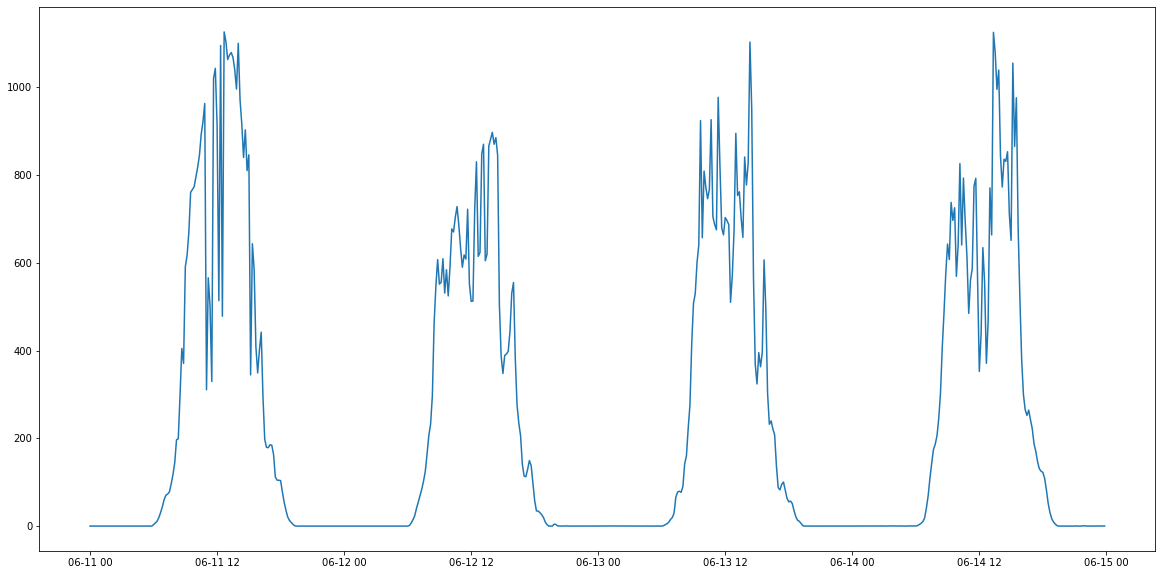

In [8]:
i=2 #hasta 7
fecha1=parse(idates[i])-pd.Timedelta('4D')
fecha2=parse(idates[i])
plt.figure(figsize=(20,10))
plt.plot(tmx_inc.Ig[fecha1:fecha2])

## Train the data

In [24]:

fecha1=parse(idates[i])-pd.Timedelta('12D')
fecha2=parse(idates[i])
train_data=tmx_inc.Ig.loc[fecha1:fecha2]
train_data = train_data.asfreq(pd.infer_freq(train_data.index))
my_order = (0,0,0)
my_seasonal_order = (2, 0, 0, 144)
# define model


In [25]:
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
start = time()
model_fit = model.fit()
end = time()
print('training_time:', end-start)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.77976D+00    |proj g|=  2.78381D-02


 This problem is unconstrained.



At iterate    5    f=  5.77539D+00    |proj g|=  1.38689D-02

At iterate   10    f=  5.77483D+00    |proj g|=  1.33642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.898D-05   5.775D+00
  F =   5.7747741233803227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
training_time: 152.69514393806458


In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                        Ig   No. Observations:                 1729
Model:             SARIMAX(2, 0, 0, 144)   Log Likelihood               -9984.584
Date:                   Mon, 20 Sep 2021   AIC                          19975.169
Time:                           13:40:15   BIC                          19991.535
Sample:                       01-18-2018   HQIC                         19981.222
                            - 01-30-2018                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L144      0.5544      0.013     42.889      0.000       0.529       0.580
ar.S.L288      0.4311      0.013     33.172      0.000       0.406       0.457
sigma2      4606.2253     80.600     57.149      0.000    4448.251    4764.199
===================================================================================
Ljung-Box (L1) (Q):                 800.84   Jarque-Bera (JB):              2382.64
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
predictions = model_fit.forecast(steps=144)
predictions = np.array(predictions)

In [28]:
predictions

array([-6.98796636e-26, -3.57871572e-25, -3.35628013e-25, -2.60841973e-25,
       -5.05147202e-27,  1.42721293e-25, -2.96699220e-26, -7.85878370e-26,
       -1.69013292e-25, -2.14275394e-25, -1.18762669e-25, -1.31116933e-25,
       -2.23310340e-25, -4.35880870e-25, -3.46858192e-25, -2.33915410e-25,
        5.76622570e-26,  2.50922085e-26, -8.76300070e-26, -3.89790858e-25,
       -3.83450961e-25, -8.93180145e-26, -3.96713655e-26, -7.70944824e-27,
       -2.64525639e-25, -1.40636082e-25,  4.81433122e-26,  5.31825503e-26,
        1.38010361e-25,  6.76114390e-26, -4.85898910e-26, -1.08657955e-25,
       -4.38062009e-26,  2.62668892e-26,  1.43790640e-25, -9.45210126e-27,
       -1.08546221e-25, -1.18339308e-25, -4.19786849e-26,  9.13247802e-26,
       -2.50979026e-26, -2.96731538e-27,  1.78458122e-01,  2.22590139e+00,
        1.65854326e+01,  3.67658530e+01,  5.06735558e+01,  8.45110096e+01,
        1.04693978e+02,  1.42360118e+02,  1.53284055e+02,  1.76815316e+02,
        2.10891067e+02,  

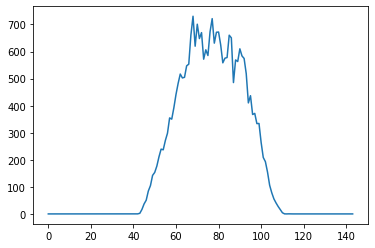

In [29]:
plt.plot(predictions)

In [30]:
nombres=['time','Ib','Ig','To','RH','WS','WD','P','Eg']
imputed=tst.exporta(path_archivo+nombre_archivo,predictions,isteps[i],datavoids[i],nombres)

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
#Falta ponerle el exporta, y hacerlo un loop. Despu'es hacer EPW, simular y sacar m'etricas

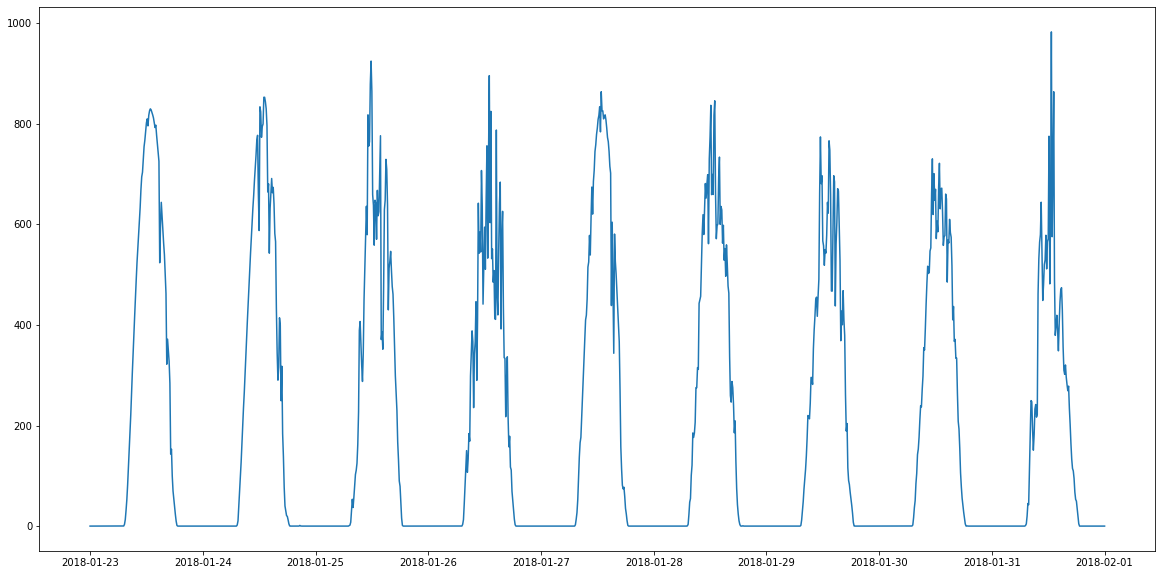

In [36]:
plt.figure(figsize=(20,10))
plt.plot(imputed.Ig.loc[parse(idates[i])-pd.Timedelta('7D'):parse(idates[i])+pd.Timedelta('2D')])

## Imputation cycle

3 years for training 2 years for testing with 1H sample 

In [43]:
path_imputed_file='../01_data/01_PreEPW/imputed_SARIMA_0_2_1.csv'
tmx_inc.to_csv(path_imputed_file)
for i in range(len(idates)):
    fecha1=parse(idates[i])-pd.Timedelta('5D')
    fecha2=parse(idates[i])
    train_data=tmx_inc.Ig.loc[fecha1:fecha2]
    train_data = train_data.asfreq(pd.infer_freq(train_data.index))
    my_order = (0,0,0)
    my_seasonal_order =(0, 2, 1, 144) #(2, 0, 1, 144)
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    start = time()
    model_fit = model.fit()
    end = time()
    print('training_time:', end-start)
    model_fit.summary()
    predictions = model_fit.forecast(steps=144) #Hago predicci'on
    predictions = np.array(predictions)
    nombres=['time','Ib','Ig','To','RH','WS','WD','P','Eg']
    #Lo meto en el archivo con los indices correspondientes
    imputed=tst.exporta(path_imputed_file,predictions,isteps[i],datavoids[i],nombres,path_exported_file=path_imputed_file,save=True)
    #necesito importar siempre el archivo en el que voy a exportar 
    plt.figure(figsize=(20,10))
    plt.plot(imputed.Ig.loc[parse(idates[i])-pd.Timedelta('1D'):parse(idates[i])+pd.Timedelta('2D')])
    plt.show()

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85825D+00    |proj g|=  2.62565D-01


 This problem is unconstrained.


KeyboardInterrupt: 

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:                          Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, [1], 144)   Log Likelihood               -3321.078
Date:                     Tue, 21 Sep 2021   AIC                           6646.157
Time:                             18:07:11   BIC                           6654.873
Sample:                         11-09-2018   HQIC                          6649.556
                              - 11-14-2018                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L144     -0.4181      0.085     -4.894      0.000      -0.586      -0.251
sigma2      5687.9472    163.482     34.792      0.000    5367.528    6008.366
===================================================================================
Ljung-Box (L1) (Q):                 431.16   Jarque-Bera (JB):              3590.52
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              20.25   Skew:                            -3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
complete=pd.read_csv('../01_data/Temixco_2018_N006c.csv',index_col=0,parse_dates=True)
complete

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


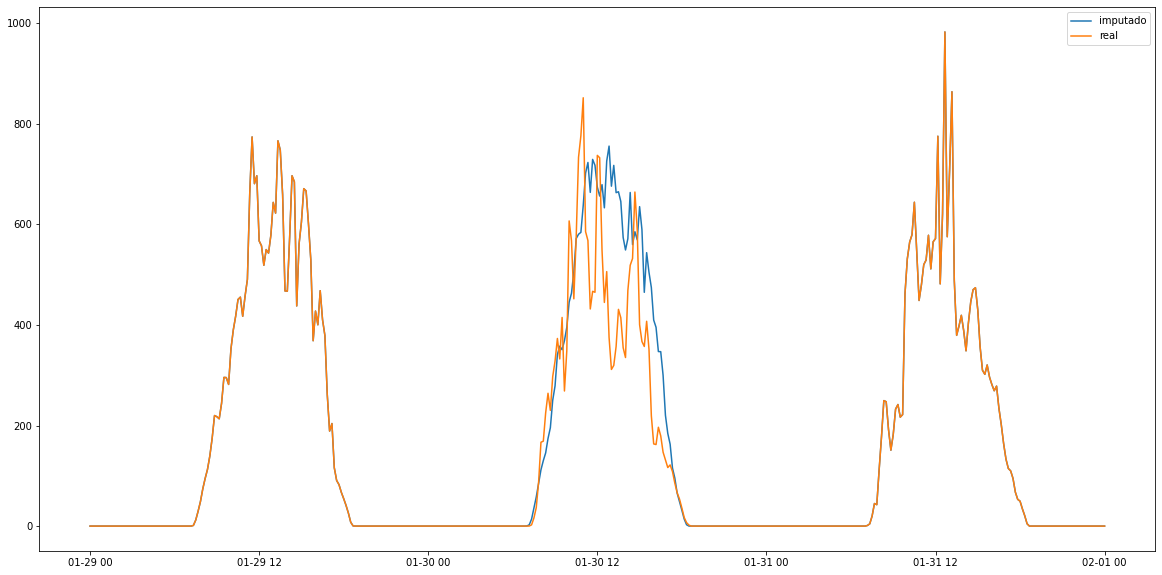

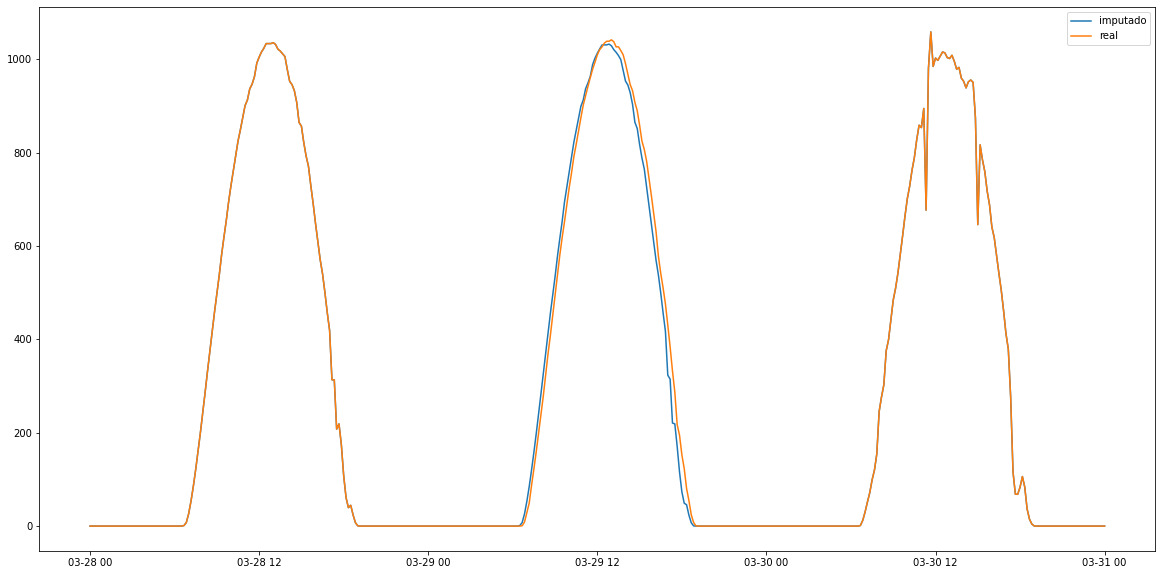

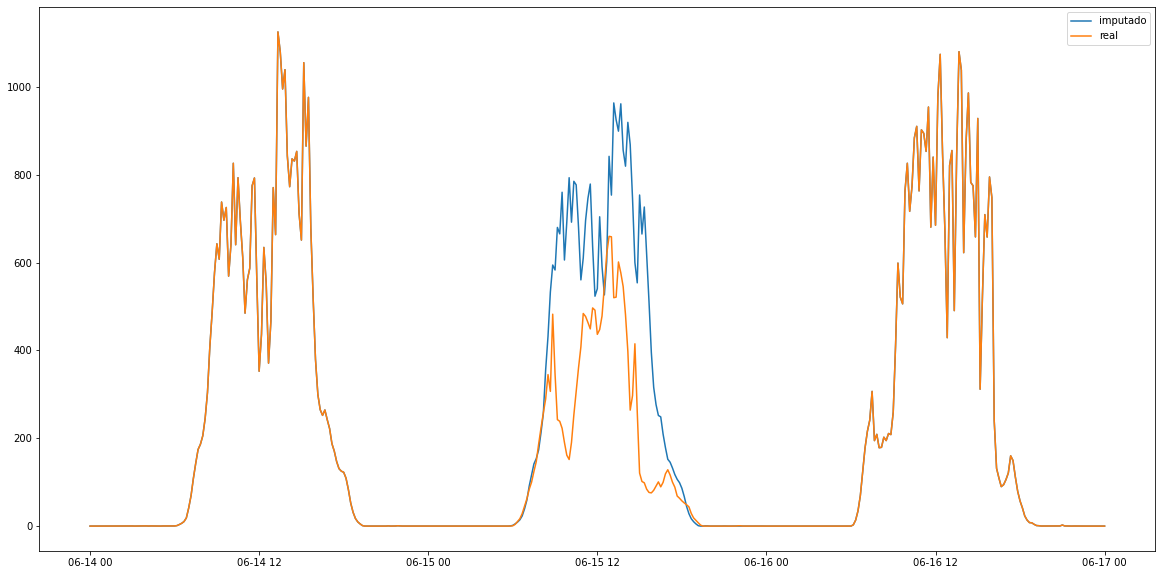

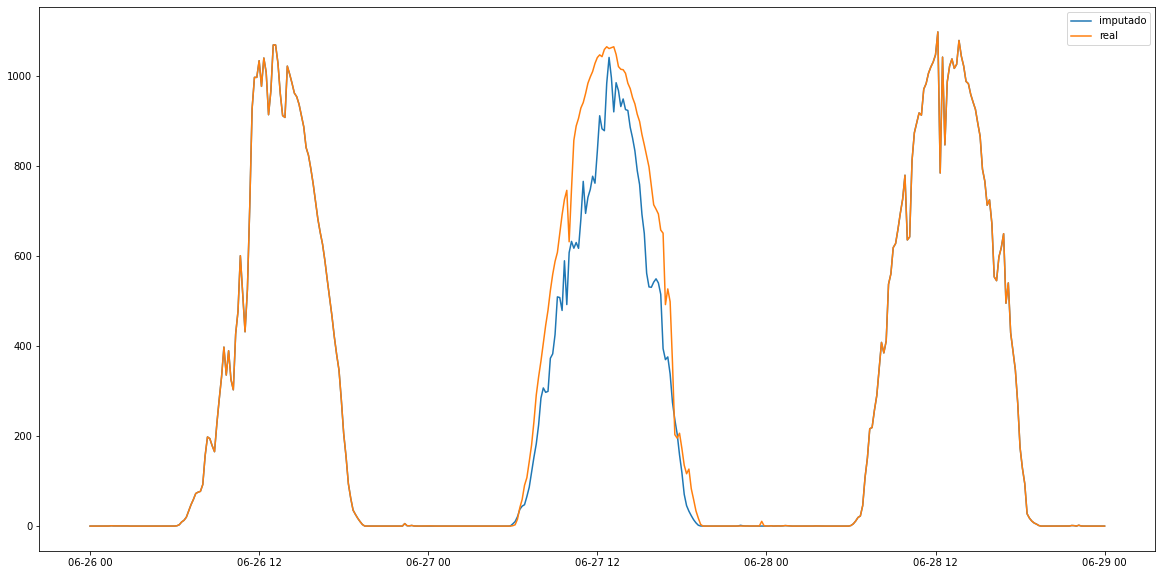

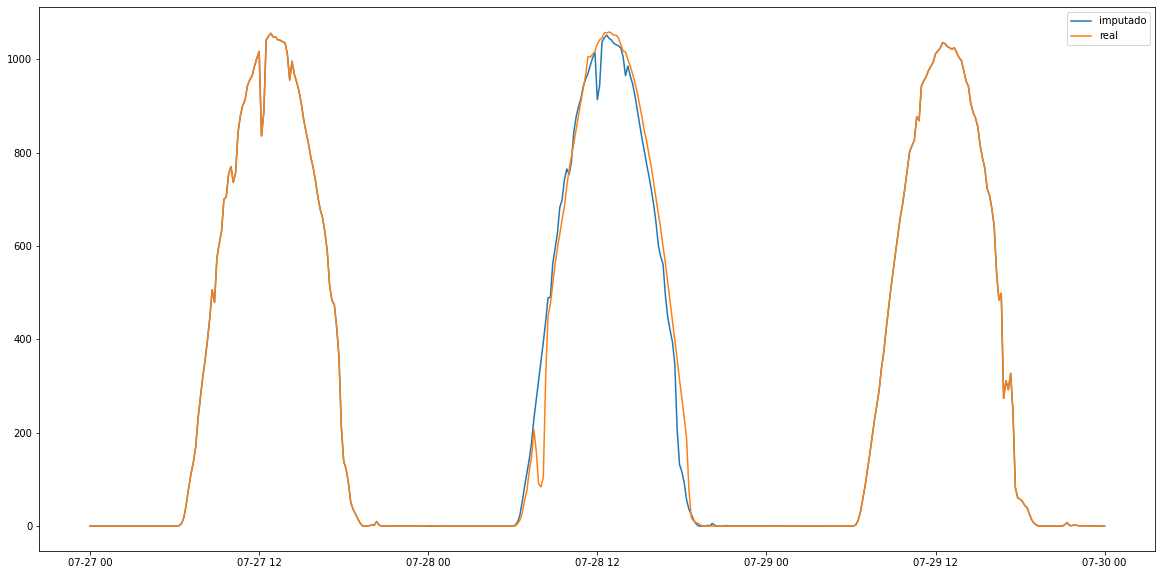

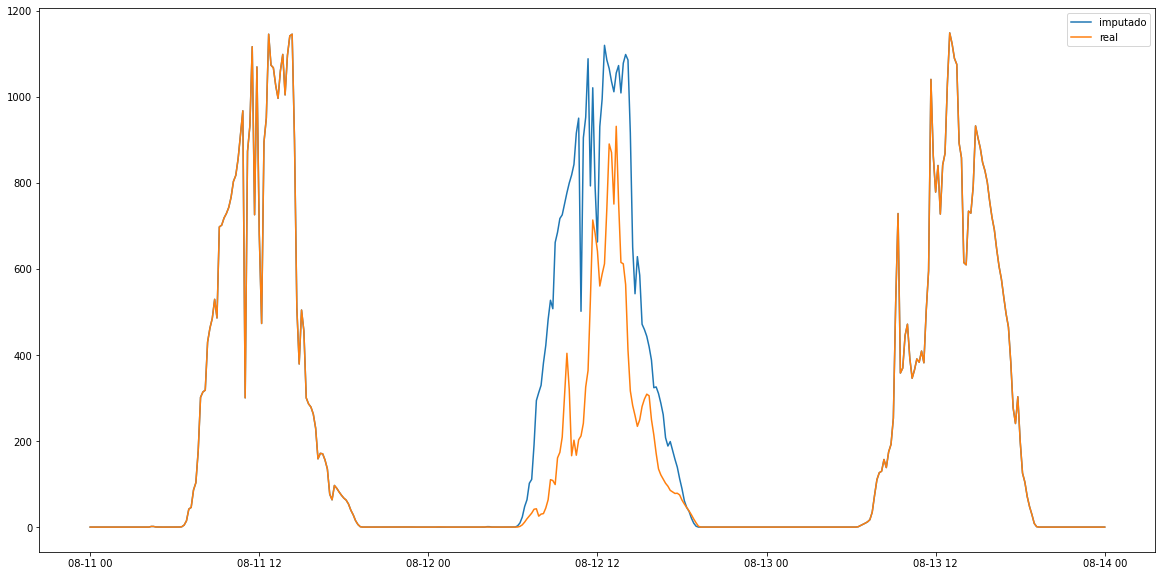

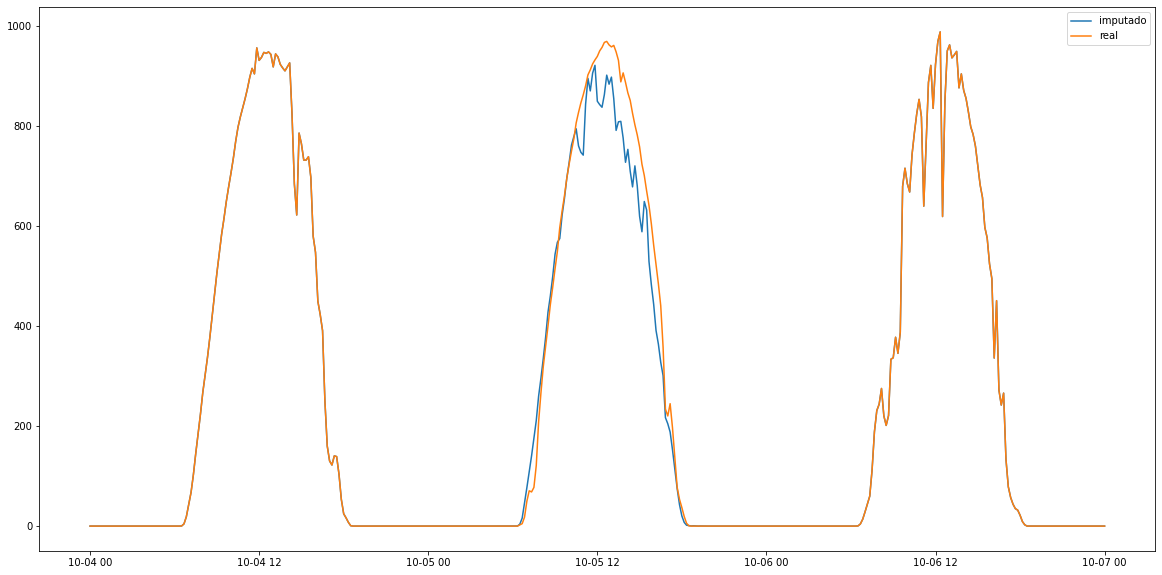

In [40]:
for i in range(0,7,1):
    fig,ax=plt.subplots(figsize=(20,10))
    ax.plot(imputed.Ig.loc[parse(idates[i])-pd.Timedelta('1D'):parse(idates[i])+pd.Timedelta('2D')],label='imputado')
    ax.plot(complete.Ig.loc[parse(idates[i])-pd.Timedelta('1D'):parse(idates[i])+pd.Timedelta('2D')],label='real')
    ax.legend()

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

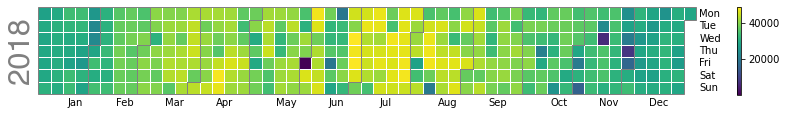

In [41]:
calplot.calplot(complete.Ig)

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

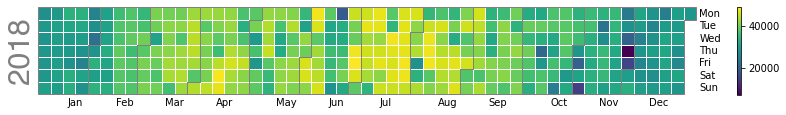

In [42]:
heio=pd.read_csv(path_imputed_file,index_col=0,parse_dates=True)
calplot.calplot(heio.Ig)